In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score

In [35]:
data = pd.read_csv(r"C:\Users\habib\OneDrive\المستندات\Depi_workingSpace\Depi_workigSpace\Contents\ML\Session4\In_session\Logistic Regression\Social_Network_Ads.csv")

In [36]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
X = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [ ]:
scale_x = StandardScaler()
x_train = scale_x.fit_transform(x_train)
x_test = scale_x.transform(x_test)


In [17]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
y_pred = classifier.predict(x_test)

In [30]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 0, 77],
       [ 0, 43]])

In [33]:
tp = 0
tn = 43
fp = 0
fn = 77

acc = (tp+tn)/(tp+tn+fp+fn)
acc

0.35833333333333334

In [22]:
ac = accuracy_score(y_test,y_pred)
ac

0.35833333333333334

In [23]:
re = recall_score(y_test,y_pred)
re

1.0

In [25]:
pr = precision_score(y_test,y_pred)
pr

0.35833333333333334

In [27]:
fs = f1_score(y_test,y_pred)
fs

0.5276073619631901

In [29]:
roc = roc_auc_score(y_test,y_pred)
roc

0.5

C:\Users\habib\AppData\Local\Temp\ipykernel_31848\269445431.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j,1],


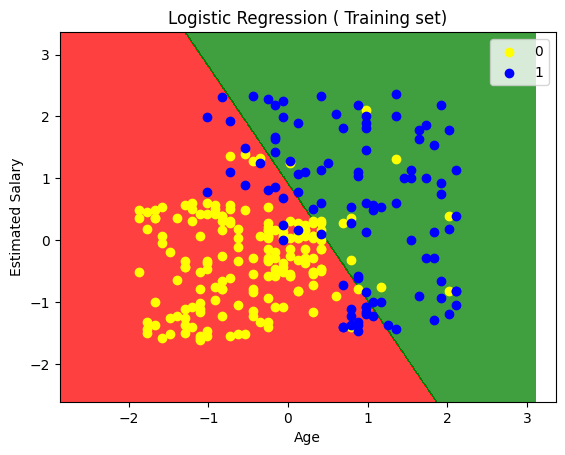

In [34]:
# Visualising the Training set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() -1, stop = X_Set[:, 0].max() +1, step = 0.01),
                    np.arange(start = X_Set[:,1].min() -1, stop = X_Set[:, 1].max() +1, step = 0.01))


plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X2.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j,1],
                c = ListedColormap(('yellow', 'blue'))(i), label = j)
plt.title('Logistic Regression ( Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()